In [ ]:
# First Run of CLTK
# Running python 3.9 on wsl Ubuntu
# I want to analyze cicero's texts and get NLP statistics.
# Important stuff to talk about: Why do this?
# I want to get a set of numbers from NLP to explain the common structures within cicero's style.
# Once done for Cicero, I want to do other authors to compare my results, and make sense of them 
# logically based on my understanding 
# of Prose comp

### To begin, we need text. Let's just start with Livy

In [3]:
# Import corpus
from cltk.data.fetch import FetchCorpus

corpus_downloader = FetchCorpus(language="lat")

corpus_downloader.list_corpora

corpus_downloader.import_corpus("lat_models_cltk")
corpus_downloader.import_corpus("lat_text_latin_library")

In [5]:
# import pro caelio speech raw text
with open("lat-livy.txt") as fo:
    livy_full = fo.read()
print("Text snippet:", livy_full[:1000])
print("Character count:", len(livy_full))
print("Approximate token count:", len(livy_full.split()))

Text snippet: Iam primum omnium satis constat Troia capta in ceteros saevitum esse Troianos, duobus, Aeneae Antenorique, et vetusti iure hospitii et quia pacis reddendaeque Helenae semper auctores fuerant, omne ius belli Achiuos abstinuisse; casibus deinde variis Antenorem cum multitudine Enetum, qui seditione ex Paphlagonia pulsi et sedes et ducem rege Pylaemene ad Troiam amisso quaerebant, venisse in intimum maris Hadriatici sinum, Euganeisque qui inter mare Alpesque incolebant pulsis Enetos Troianosque eas tenuisse terras. Et in quem primo egressi sunt locum Troia vocatur pagoque inde Troiano nomen est: gens universa Veneti appellati. Aeneam ab simili clade domo profugum sed ad maiora rerum initia ducentibus fatis, primo in Macedoniam venisse, inde in Siciliam quaerentem sedes delatum, ab Sicilia classe ad Laurentem agrum tenuisse. Troia et huic loco nomen est. Ibi egressi Troiani, ut quibus ab immenso prope errore nihil praeter arma et naues superesset, cum praedam ex agris agerent

In [12]:
len(livy_full) // 12

76740

In [6]:
# run NLP pipeline on Livy text
from cltk import NLP
cltk_nlp = NLP(language="lat")
# Removing ``LatinLexiconProcess`` for this demo b/c it is slow (adds ~9 mins total)
cltk_nlp.pipeline.processes.pop(-1)
print(cltk_nlp.pipeline.processes)

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.
[<class 'cltk.alphabet.processes.LatinNormalizeProcess'>, <class 'cltk.dependency.processes.LatinStanzaProcess'>, <class 'cltk.embeddings.processes.LatinEmbeddingsProcess'>, <class 'cltk.stops.processes.StopsProcess'>]


In [7]:
# Now execute NLP algorithms upon input text
# Takes a while
%time cltk_doc = cltk_nlp.analyze(text=livy_full)

CPU times: user 3min 13s, sys: 9.79 s, total: 3min 22s
Wall time: 3min 11s


In [8]:
#inspect our output
print(type(cltk_doc))

<class 'cltk.core.data_types.Doc'>


In [9]:
# All accessors
print([x for x in dir(cltk_doc) if not x.startswith("__")])

['_get_words_attribute', 'embeddings', 'embeddings_model', 'language', 'lemmata', 'morphosyntactic_features', 'normalized_text', 'pipeline', 'pos', 'raw', 'sentence_embeddings', 'sentences', 'sentences_strings', 'sentences_tokens', 'stanza_doc', 'stems', 'tokens', 'tokens_stops_filtered', 'words']


In [9]:
## List of sentences?
print(cltk_doc.sentences_strings[:2])

['Iam primum omnium satis constat Troia capta in ceteros saevitum esse Troianos , duobus , Aeneae Antenorique , et vetusti iure hospitii et quia pacis reddendaeque Helenae semper auctores fuerant , omne ius belli Achiuos abstinuisse ;', 'casibus deinde variis Antenorem cum multitudine Enetum , qui seditione ex Paphlagonia pulsi et sedes et ducem rege Pylaemene ad Troiam amisso quaerebant , venisse in intimum maris Hadriatici sinum , Euganeisque qui inter mare Alpesque incolebant pulsis Enetos Troianosque eas tenuisse terras .']


In [10]:
len(cltk_doc.tokens) 

149199

In [13]:
# Let's look at a non-trivial sentence from Book 1
print("Original:", cltk_doc.sentences_strings[5])
print("")
print("Translation:", "Landing there, the Trojans, as men who, after their all but immeasurable wanderings, had nothing left but their swords and ships, were driving booty from the fields, when King Latinus and the Aborigines, who then occupied that country, rushed down from their city and their fields to repel with arms the violence of the invaders.")
# source: http://www.perseus.tufts.edu/hopper/text?doc=Liv.+1+1+5&fromdoc=Perseus%3Atext%3A1999.02.0151
sentence_6 = cltk_doc.sentences[5]  # type: List[Word]

Original: Ibi egressi Troiani , ut quibus ab immenso prope errore nihil praeter arma et naues superesset , cum praedam ex agris agerent , Latinus rex Aboriginesque qui tum ea tenebant loca ad arcendam vim advenarum armati ex urbe atque agris concurrunt .

Translation: Landing there, the Trojans, as men who, after their all but immeasurable wanderings, had nothing left but their swords and ships, were driving booty from the fields, when King Latinus and the Aborigines, who then occupied that country, rushed down from their city and their fields to repel with arms the violence of the invaders.


In [14]:
# Looking at one Word, 'concurrunt' ('they run together')
a_word_concurrunt = sentence_6[40]
print(a_word_concurrunt)

Word(index_char_start=None, index_char_stop=None, index_token=40, index_sentence=5, string='concurrunt', pos=verb, lemma='concurro', stem=None, scansion=None, xpos='L3|modA|tem1|gen9', upos='VERB', dependency_relation='advcl', governor=29, features={Aspect: [imperfective], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}, category={F: [neg], N: [neg], V: [pos]}, stop=False, named_entity=None, syllables=None, phonetic_transcription=None, definition=None)


In [15]:
# morphological info at .pos and .string
print("`Word.string`:", a_word_concurrunt.string)
print("")
# Part-of-speech is always be available at `.pos`.
print("`Word.pos`:", a_word_concurrunt.pos)

`Word.string`: concurrunt

`Word.pos`: verb


In [16]:
# type
print("type(`Word.features`):", type(a_word_concurrunt.features))
print("")
# str repr of `MorphosyntacticFeatureBundle`
print("`Word.features`:", a_word_concurrunt.features)

type(`Word.features`): <class 'cltk.morphology.morphosyntax.MorphosyntacticFeatureBundle'>

`Word.features`: {Aspect: [imperfective], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}


In [17]:
print("Mood:", a_word_concurrunt.features["Mood"])  # type: List[Mood]
print("Number:", a_word_concurrunt.features["Number"])  # type: List[Number]
print("Person:", a_word_concurrunt.features["Person"])  # type: List[Person]
print("Tense:", a_word_concurrunt.features["Tense"])  # type: List[Tense]
print("VerbForm:", a_word_concurrunt.features["VerbForm"])  # type: List[VerbForm]
print("Voice:", a_word_concurrunt.features["Voice"])  # type: List[Voice]



Mood: [indicative]
Number: [plural]
Person: [third]
Tense: [present]
VerbForm: [finite]
Voice: [active]


In [18]:
# model syntax
from cltk.dependency.tree import DependencyTree

In [19]:
# Let's look at this sentence again
print(cltk_doc.sentences_strings[5])  # text form of `sentence_6`

Ibi egressi Troiani , ut quibus ab immenso prope errore nihil praeter arma et naues superesset , cum praedam ex agris agerent , Latinus rex Aboriginesque qui tum ea tenebant loca ad arcendam vim advenarum armati ex urbe atque agris concurrunt .


In [21]:
a_tree = DependencyTree.to_tree(sentence_6)
from pprint import pprint

pprint(a_tree.get_dependencies())

[advmod(egressi_1/verb, Ibi_0/adverb),
 punct(superesset_15/verb, ,_3/punctuation),
 mark(superesset_15/verb, ut_4/subordinating_conjunction),
 obl(superesset_15/verb, quibus_5/pronoun),
 obl(superesset_15/verb, errore_9/noun),
 obl(superesset_15/verb, arma_12/noun),
 case(immenso_7/adjective, ab_6/adposition),
 obl:arg(superesset_15/verb, immenso_7/adjective),
 case(errore_9/noun, prope_8/adposition),
 obl(superesset_15/verb, quibus_5/pronoun),
 obl(superesset_15/verb, errore_9/noun),
 obl(superesset_15/verb, arma_12/noun),
 nsubj(superesset_15/verb, nihil_10/pronoun),
 case(arma_12/noun, praeter_11/adposition),
 cc(naues_14/noun, et_13/coordinating_conjunction),
 conj(arma_12/noun, naues_14/noun),
 obl(superesset_15/verb, quibus_5/pronoun),
 obl(superesset_15/verb, errore_9/noun),
 obl(superesset_15/verb, arma_12/noun),
 punct(agerent_21/verb, ,_16/punctuation),
 mark(agerent_21/verb, cum_17/subordinating_conjunction),
 obj(agerent_21/verb, praedam_18/noun),
 obj(agerent_21/verb, Abo

In [54]:
print("Original:", cltk_doc.sentences_strings[5])
a_tree.print_tree()

Original: Ibi egressi Troiani , ut quibus ab immenso prope errore nihil praeter arma et naues superesset , cum praedam ex agris agerent , Latinus rex Aboriginesque qui tum ea tenebant loca ad arcendam vim advenarum armati ex urbe atque agris concurrunt .
root | egressi_1/verb
    └─ advmod | Ibi_0/adverb
    └─ nsubj:pass | Troiani_2/noun
        └─ acl:relcl | superesset_15/verb
            └─ punct | ,_3/punctuation
            └─ mark | ut_4/subordinating_conjunction
            └─ obl | quibus_5/pronoun
            └─ obl:arg | immenso_7/adjective
                └─ case | ab_6/adposition
            └─ obl | errore_9/noun
                └─ case | prope_8/adposition
            └─ nsubj | nihil_10/pronoun
            └─ obl | arma_12/noun
                └─ case | praeter_11/adposition
                └─ conj | naues_14/noun
                    └─ cc | et_13/coordinating_conjunction
            └─ advcl | agerent_21/verb
                └─ punct | ,_16/punctuation
                

In [ ]:
#The CLTK offers the function `cltk_doc_to_features_table()`, which assist users when preparing a `Doc` for 
# training data for machine learning.
# It convertss the list of `Word` objects at `Doc.words` into a tabular list of lists.


In [23]:
from cltk.utils.feature_extraction import cltk_doc_to_features_table
feature_names, list_of_list_features = cltk_doc_to_features_table(cltk_doc=cltk_doc)
# See here the names of the features extracted
print(feature_names)

['string', 'lemma', 'embedding', 'is_stop', 'lemma', 'pos', 'case', 'gender', 'animacy', 'number', 'definiteness', 'degree', 'strength', 'verbform', 'tense', 'mood', 'aspect', 'voice', 'person', 'polarity', 'politeness', 'clusivity', 'evidentiality', 'strength', 'governing_word', 'governor_case', 'governor_gender', 'governor_animacy', 'governor_number', 'governor_definiteness', 'governor_degree', 'governor_strength', 'governor_verbform', 'governor_tense', 'governor_mood', 'governor_aspect', 'governor_voice', 'governor_person', 'governor_polarity', 'governor_politeness', 'governor_clusivity', 'governor_evidentiality', 'governor_strength', 'governing_relationship']


In [24]:
# Look at one row of data `(variable name, variable value)`
pprint(list(zip(feature_names, list_of_list_features[108])))

[('string', 'maiora'),
 ('lemma', 'magnus'),
 ('embedding',
  array([ 3.1152e-01, -1.1366e-01,  6.3455e-01, -1.6636e-01, -9.1715e-02,
       -7.0006e-01,  4.9016e-03,  1.7313e-01, -6.2384e-01,  2.8915e-01,
       -4.8178e-02,  5.8635e-01, -2.7733e-01, -6.0978e-02,  1.6089e-01,
       -1.0762e-01, -1.0675e-01, -2.5978e-01,  5.8688e-02, -6.0002e-01,
        8.6431e-02,  4.7491e-01,  9.2146e-01,  9.1792e-02, -2.0047e-01,
        2.2253e-01,  1.1603e-01, -6.4243e-01, -2.9252e-01, -4.5801e-01,
       -3.7719e-01, -3.1736e-01,  3.5512e-01, -2.3647e-01, -3.1892e-01,
        4.8957e-01, -4.4562e-01, -2.6089e-01, -4.6476e-02,  7.4921e-02,
       -1.5463e-01, -6.2637e-01,  1.5846e-01,  6.3803e-04,  2.2901e-01,
        6.2800e-01, -6.1929e-02,  5.6568e-01, -2.5044e-01, -1.2341e-02,
        2.2386e-02, -1.3362e-01, -1.5307e-01, -8.9683e-02, -2.0990e-01,
        3.8610e-01,  6.7727e-02,  5.5898e-01, -3.3728e-02, -4.0117e-02,
        1.0060e-01,  3.8961e-01, -7.0133e-01,  4.3337e-01,  1.2595e-01,
  

In [27]:
from collections import defaultdict
from functools import lru_cache
from typing import Union, List, Dict, Set, Optional

from cltk.core import Doc, Word, CLTKException
from boltons.cacheutils import cachedproperty


class QueryResults:


    def __init__(self):
        self.matches: Dict[Doc, List[Union[Word, List[Word]]]] = {}

    def __add__(self, other):
        if isinstance(other, QueryResult):
            qrs = QueryResults()
            qrs.matches = self.matches
            qrs.matches[other.doc] = other.matches
            return qrs

        elif isinstance(other, QueryResults):
            qrs = QueryResults()
            qrs.matches.update(self.matches)
            qrs.matches.update(other.matches)
            return qrs
        else:
            raise ValueError()

    @cachedproperty
    def matches(self):
        matches = []
        for key in self.matches:
            matches.extend(self.matches[key])
        return matches

    def __setitem__(self, key: Doc, value: List[Union[Word, List[Word]]]):
        self.matches[key] = value

    def __getitem__(self, item: Doc):
        return self.matches[item]


In [28]:
class WordMatch:
    def __init__(self, word_ref: Word, word_compare: Word, fuzzy=False, only_attrs=None):
        """
        >>> WordMatch()
        """
        self.w1 = word_ref
        self.w2 = word_compare
        self.fuzzy = fuzzy
        self._only_attrs = only_attrs
        self._check()

    def _check(self):
        """
        >>> m = WordMatch()
        >>> m._check()
        """

        if self._only_attrs:
            attributes_to_check = self._only_attrs
        else:
            attributes_to_check = Word.__dict__.keys()
        # for key in attributes_to_check:
        #     if key == 'pos':
        #     elif key == 'upos':
        #     elif key == 'lemma':
        #     elif key == 'string':
        #     elif key == 'phonetic_transcription':
        #     elif key == 'category':
        #     elif key == 'definition':
        #     elif key == 'dependency_relation':
        #     elif key == 'embedding':
        #     elif key == 'features':
        #     elif key == 'governor':
        #     elif key == 'named_entity':
        #
        #     Word.pos
        #     Word.upos
        #     Word.xpos
        #     Word.lemma
        #     Word.string
        #     Word.phonetic_transcription
        #     Word.category
        #     Word.definition
        #     Word.dependency_relation
        #     Word.embedding
        #     Word.features
        #     Word.governor
        #     Word.named_entity
        #     Word.scansion
        #     Word.stem
        #     Word.stop
        #     Word.syllables

    @staticmethod
    def are_vectors_similar(self, v1, v2, ) -> bool:
        pass

    def are_strings_similar(self, s1, s2, strict=True) -> bool:
        if strict:
            pass
        return True

    def starts_with(self, ):
        pass

    def ends_with(self):
        pass

    def are_equal(self):
        pass




In [29]:
class QueryResult:
    """
    """
    def __init__(self, doc: Doc):
        self.matches = []
        self.doc = doc

    def add_match(self, match: Union[Word, List[Word]]):
        self.matches.append(match)

    @cachedproperty
    def total(self):
        return len(self.matches)

    def __add__(self, other):
        if isinstance(other, QueryResult):
            qrs = QueryResults()
            qrs[self.doc] = self.matches
            qrs[other.doc] = other.matches
            return qrs
        else:
            raise ValueError()




In [30]:
class WordQuery:
    def __init__(self, *args: Word):
        """
        >>> wq = WordQuery(Word(string="E",), Word(string="Ju"))
        >>> wq.values
        """
        self.words: List[Word] = list(args)

    @property
    @lru_cache()
    def values(self) -> defaultdict[str, Word]:
        values: defaultdict = defaultdict(list)
        for w in self.words:
            for key in w.__dict__.keys():
                if w.__dict__[key]:
                    values[key].append(w.__dict__[key])

        return values

    def __add__(self, other):
        """
        >>> wq1 = WordQuery(Word(string="E"))
        >>> wq2 = WordQuery(Word(string="Ju"))
        >>> wq = wq1 + wq2
        >>> wq.words
        >>> wq.values
        """
        if isinstance(other, WordQuery):
            return WordQuery(*(self.words + other.words))
        return None

    def starts_with(self, word: Word, attribute: str, lower=False) -> bool:
        if hasattr(word, attribute):
            value = word.__dict__[attribute]
            if lower:
                value = value.lower()
            if type(value) == str:
                for v in self.values[attribute]:
                    if value.startswith(v):
                        # print(word.__dict__[key], word_query.values[key])
                        return True
        return False

    def ends_with(self, word: Word, attribute: str, lower=False) -> bool:
        if hasattr(word, attribute):
            value = word.__dict__[attribute]
            if lower:
                value = value.lower()
            if type(value) == str:
                for v in self.values[attribute]:
                    if value.endswith(v):
                        # print(word.__dict__[key], word_query.values[key])
                        return True
        return False

    def equals(self, word: Word):
        fields_to_compare = self.values.keys()
        # print(fields_to_compare)
        for key in fields_to_compare:
            if word.__dict__[key] in self.values[key]:
                # print(word.__dict__[key], word_query.values[key])
                yield word

    def is_contained(self, word: Word):
        fields_to_compare = self.values.keys()
        # print(fields_to_compare)
        for key in fields_to_compare:
            if word.__dict__[key] in self.values[key]:
                # print(word.__dict__[key], word_query.values[key])
                yield word



In [31]:
class Query:
    """
    >>> from cltk import NLP
    >>> lat_nlp = NLP("non", suppress_banner=True)
    >>> doc = non_nlp.analyze("ek er armr")
    >>> q = Query(doc)
    >>> from cltk.core.data_types import Word
    >>> word_query = WordQuery(Word(string="er"))
    >>> r = q.filter(word_query)
    >>> r.total
    1
    >>> r.matches[0].string
    'er'
    >>> r.doc.tokens
    ['ek', 'er', 'armr']
    """

    def __init__(self,
                 doc: Doc):
        self.doc = doc

    def filter(self, word_query: Union[WordQuery, List[WordQuery]]) -> QueryResult:
        """
        >>> from cltk import NLP
        >>> non_nlp = NLP("non", suppress_banner=True)
        >>> doc = non_nlp.analyze("ek er armr")
        >>> q = Query(doc)
        >>> from cltk.core.data_types import Word
        >>> word_query = WordQuery(Word(string="er"))
        >>> r = q.filter(word_query)
        >>> r.total
        1
        >>> r.matches[0].string
        'er'
        >>> r.doc.tokens
        ['ek', 'er', 'armr']
        >>> wq1 = WordQuery(Word(string="er"))
        >>> wq2 = WordQuery(Word(string="armr"))
        >>> r = q.filter([wq1, wq2])
        >>> r.total
        1
        >>> [[w.string for w in m] for m in r.matches]
        [['er', 'armr']]
        """
        result = QueryResult(self.doc)
        if isinstance(word_query, WordQuery):
            for i, word in enumerate(self.doc.words):
                for word_match in word_query.equals(word):
                    result.add_match(word_match)

        elif type(word_query) == list:
            doc_size = len(self.doc.words)
            # print(f"doc size {doc_size}")
            query_size = len(word_query)
            # print(f"query size {query_size}")
            for i, word in enumerate(self.doc.words):
                if i + query_size <= doc_size:
                    matches = True
                    for j in range(query_size):
                        a_match = False
                        # print(i, j, self.doc.words[i+j], word_query[j])
                        # for _ in self._filter_word_query(self.doc.words[i+j], word_query[j]):
                        for _ in word_query[j].equals(self.doc.words[i+j]):
                            a_match = True
                            # print(f"a match!!! {self.doc.words[i+j]} {word_query[j]}")
                        matches = matches and a_match
                        if not matches:
                            break
                    if matches:
                        result.add_match(self.doc.words[i: i+query_size])
        return result

    def _filter_word_query(self, word: Word, word_query: WordQuery):
        return
        # fields_to_compare = word_query.values.keys()
        # # print(fields_to_compare)
        # for key in fields_to_compare:
        #     if word.__dict__[key] in word_query.values[key]:
        #         # print(word.__dict__[key], word_query.values[key])
        #         yield word

    def filter_cooccurrence(self, word_query: Union[List[WordQuery], WordQuery]):
        """
        >>> from cltk import NLP
        >>> non_nlp = NLP("non", suppress_banner=True)
        >>> doc = non_nlp.analyze("ek er armr")
        >>> q = Query(doc)
        >>> from cltk.core.data_types import Word
        >>> word_query = WordQuery(Word(string="er"))
        >>> r = q.filter(word_query)
        >>> r.total
        1
        >>> r.matches[0].string
        'er'
        >>> r.doc.tokens
        ['ek', 'er', 'armr']
        """
        if type(word_query) == list:
            pass
        elif type(word_query) == set:
            pass
        else:
            raise CLTKException("wrong argument")

    @staticmethod
    def are_equal(doc_word: Word, query_word: Word) -> Optional[WordMatch]:
        matches = WordMatch(doc_word, query_word)
        if matches.ends_with():
            return matches
        return None

    @cachedproperty
    def result(self):
        return self.result

    def starts_with(self, word_query: WordQuery, attribute: str, returns_bool=True, lower=False) -> Union[bool, QueryResult]:
        """
        >>> from cltk import NLP
        >>> non_nlp = NLP("non", suppress_banner=True)
        >>> doc = non_nlp.analyze("ek er armr")
        >>> q = Query(doc)
        >>> from cltk.core.data_types import Word
        >>> w = Word(string="ar")
        >>> word_query = WordQuery(w)
        >>> q.starts_with(word_query, 'string')
        True
        >>> wq2 = WordQuery(Word(string='ke'))
        >>> q.starts_with(wq2, 'string')
        False
        """
        result = QueryResult(self.doc)
        for i, word in enumerate(self.doc.words):
            if word_query.starts_with(word, attribute, lower):
                result.add_match(word)
        if returns_bool:
            return len(result.matches) > 0
        else:
            return result

    def ends_with(self, word_query: WordQuery, attribute: str, returns_bool=True) -> Union[bool, QueryResult]:
        """
        >>> from cltk import NLP
        >>> non_nlp = NLP("non", suppress_banner=True)
        >>> doc = non_nlp.analyze("ek er armr")
        >>> q = Query(doc)
        >>> from cltk.core.data_types import Word
        >>> w = Word(string="mr")
        >>> word_query = WordQuery(w)
        >>> q.ends_with(word_query, 'string')
        True
        >>> q.ends_with(WordQuery(Word(string="ir")), attribute="string")
        False
        """
        result = QueryResult(self.doc)
        for i, word in enumerate(self.doc.words):
            if word_query.ends_with(word, attribute):
                result.add_match(word)
        if returns_bool:
            return len(result.matches) > 0
        else:
            return result

    def __contains__(self, word_query: WordQuery) -> bool:
        """
        >>> from cltk import NLP
        >>> non_nlp = NLP("non", suppress_banner=True)
        >>> doc = non_nlp.analyze("ek er armr")
        >>> q = Query(doc)
        >>> from cltk.core.data_types import Word
        >>> w = Word(string="rm")
        >>> word_query = WordQuery(w)
        >>> word_query in q
        """
        return self.contains(word_query, returns_bool=True)

    def contains(self, word_query: WordQuery, returns_bool=True) -> Union[bool, QueryResult]:
        """
        >>> from cltk import NLP
        >>> non_nlp = NLP("non", suppress_banner=True)
        >>> doc = non_nlp.analyze("ek er armr")
        >>> q = Query(doc)
        >>> from cltk.core.data_types import Word
        >>> w = Word(string="er")
        >>> word_query = WordQuery(w)
        >>> q.contains(word_query)
        """
        result = QueryResult(self.doc)
        for i, word in enumerate(self.doc.words):
            if word_query.is_contained(word):
                result.add_match(word)
        if returns_bool:
            return len(result.matches) > 0
        return result

In [41]:
# test out this function
from cltk import NLP
lat_nlp = NLP("lat", suppress_banner=True)
doc = lat_nlp.analyze("cogito ergo sum")
q = Query(doc)
from cltk.core.data_types import Word
word_query = WordQuery(Word(string="sum"))
r = q.filter(word_query)
r.total

1

In [42]:
r.matches[0].string
r.doc.tokens
    

['cogito', 'ergo', 'sum']

In [47]:
w = Word(string="s")
word_query = WordQuery(w)
q.starts_with(word_query, 'string')

True

In [48]:
wq2 = WordQuery(Word(string='m'))
q.starts_with(wq2, 'string')

False

In [ ]:
w = Word(string="")
word_query = WordQuery(w)
q.ends_with(word_query, 'string')
# check   
q.ends_with(WordQuery(Word(string="ir")), attribute="string")


In [61]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.6 MB/s eta 0:00:0000:0100:01
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00a 0:00:01


In [11]:
# most common words
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
#
sentences=cltk_doc.sentences_strings
words= cltk_doc.sentences_tokens
LATIN_STOPS_LIST = ["ab", "ac", "ad", "adhic", "aliqui", "aliquis", "an", "ante", "apud", "at", "atque", "aut", "autem",
                    "cum", "cur", "de", "deinde", "dum", "ego", "enim", "ergo", "es", "est", "et", "etiam", "etsi", "ex",
                    "fio", "haud", "hic", "iam", "idem", "igitur", "ille", "in", "infra", "inter", "interim", "ipse", "is",
                    "ita", "magis", "modo", "mox", "nam", "ne", "nec", "necque", "neque", "nisi", "non", "nos", "o", "ob",
                    "per", "possum", "post", "pro", "quae", "quam", "quare", "qui", "quia", "quicumque", "quidem",
                    "quilibet", "quis", "quisnam", "quisquam", "quisque", "quisquis", "quo", "quoniam", "sed", "si", "sic",
                    "sive", "sub", "sui", "sum", "super", "suus", "tam", "tamen", "trans", "tu", "tum", "ubi", "uel", "uero"]
# def function

import pandas as pd

def create_word_freq_table(sentences):
    # Remove punctuation and create a single list of words
    words = [re.sub(r'[^\w\s]', '', word) for sentence in sentences for word in sentence]

    # Remove stop words and empty strings
    filtered_words = [word for word in words if word not in LATIN_STOPS_LIST and word != '' and len(word) != 1]

    # Calculate word frequencies
    word_freq_counter = Counter(filtered_words)

    # Create the table with word frequencies
    word_freq_table = pd.DataFrame({"Word": list(word_freq_counter.keys()), "Frequency": list(word_freq_counter.values())})
    word_freq_table.sort_values(by="Frequency", ascending=False, inplace=True)
    word_freq_table.reset_index(drop=True, inplace=True)

    return word_freq_table

sentences = cltk_doc.sentences_tokens
word_freq_table = create_word_freq_table(sentences)
display(word_freq_table)


,Word,Frequency
0,ut,1143
1,se,861
2,esse,607
3,quod,566
4,esset,443
...,...,...
25157,patruus,1
25158,iurgio,1
25159,orantis,1
25160,parentisque,1


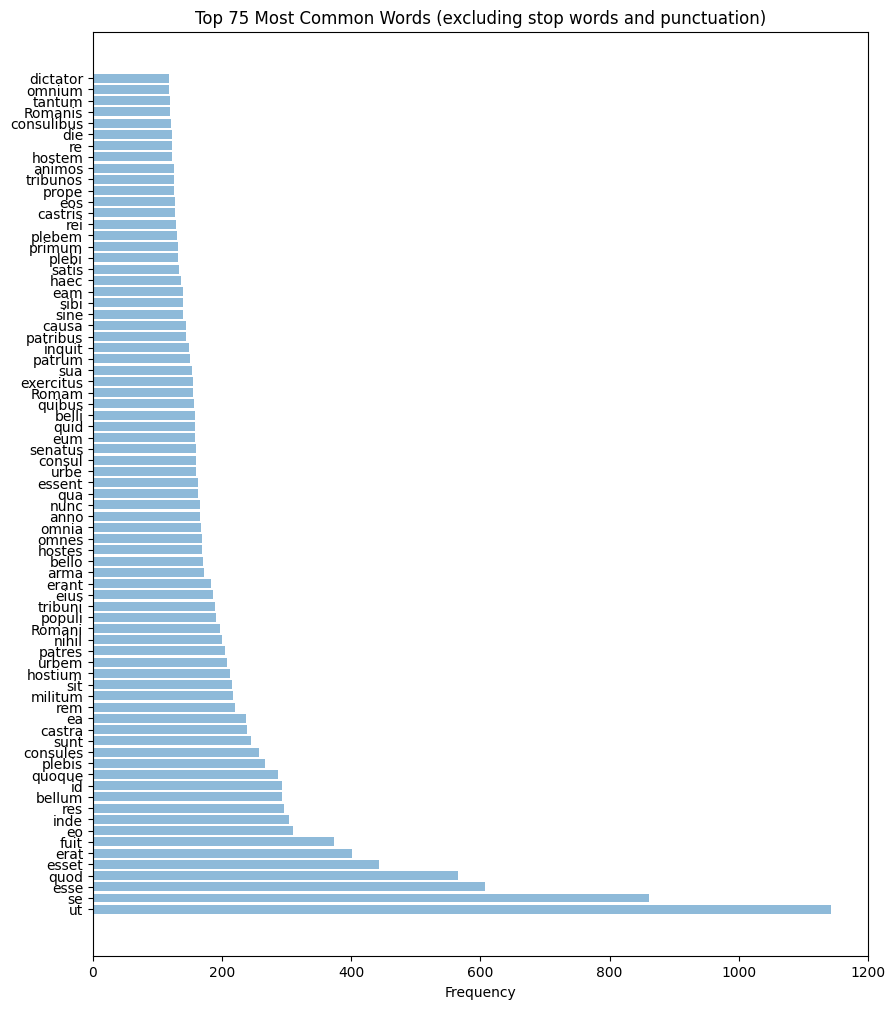

In [12]:

def plot_histogram(word_freq_table, n_most_common=75):
    # Get the top N words and their frequencies
    top_n_words = word_freq_table.head(n_most_common)
    words = top_n_words["Word"]
    frequencies = top_n_words["Frequency"]

    # Plot the histogram of word frequencies
    plt.figure(figsize=(10, 12))
    y_pos = np.arange(len(words))

    plt.barh(y_pos, frequencies, align='center', alpha=0.5)
    plt.yticks(y_pos, words)
    plt.xlabel('Frequency')
    plt.title(f'Top {n_most_common} Most Common Words (excluding stop words and punctuation)')

    plt.show()

# Call the functions with your data
sentences = cltk_doc.sentences_tokens

plot_histogram(word_freq_table)

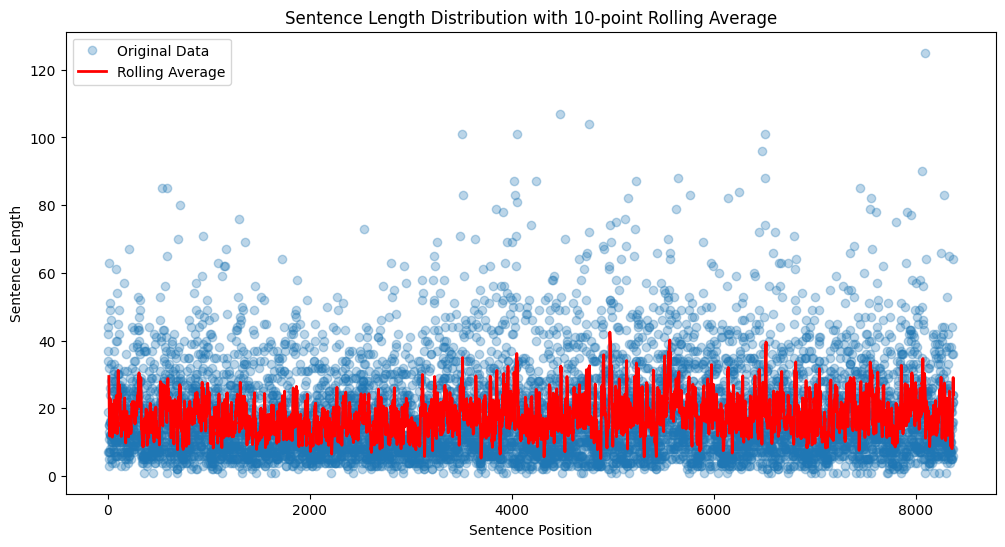

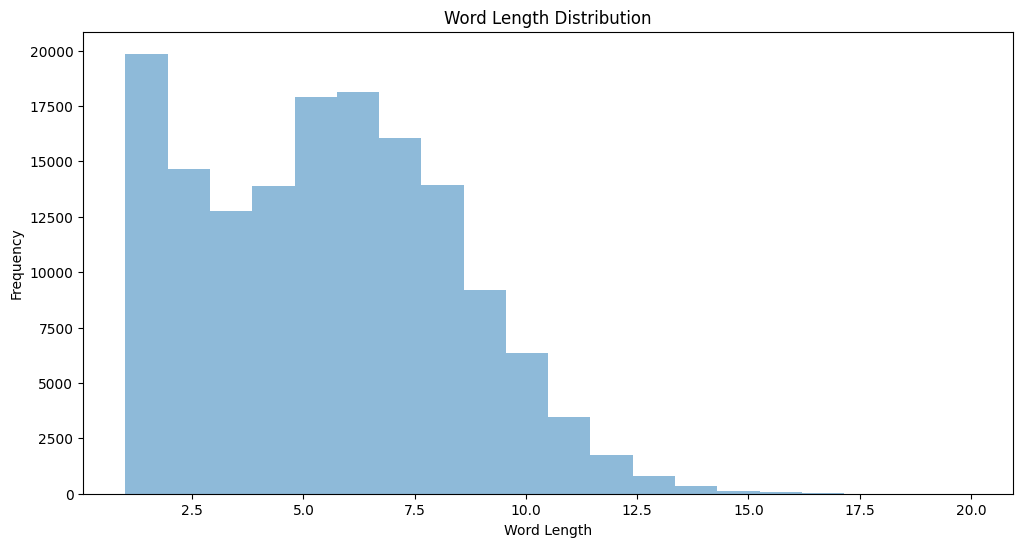

In [13]:
import numpy as np

def rolling_average(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

def plot_length_distribution(sentences, window=10):
    # Calculate sentence lengths
    sentence_lengths = [len(sentence) for sentence in sentences]
    sentence_positions = range(1, len(sentences) + 1)

    # Calculate rolling average of sentence lengths
    rolling_avg_lengths = rolling_average(sentence_lengths, window)
    rolling_avg_positions = range(window, len(sentences) + 1)

    # Plot sentence length distribution with rolling average
    plt.figure(figsize=(12, 6))
    plt.plot(sentence_positions, sentence_lengths, marker='o', linestyle='', alpha=0.3, label='Original Data')
    plt.plot(rolling_avg_positions, rolling_avg_lengths, marker='', linestyle='-', linewidth=2, color='r', label='Rolling Average')
    plt.xlabel('Sentence Position')
    plt.ylabel('Sentence Length')
    plt.title(f'Sentence Length Distribution with {window}-point Rolling Average')
    plt.legend()

    plt.show()

    # Calculate word lengths
    words = [word for sentence in sentences for word in sentence]
    word_lengths = [len(word) for word in words]

    # Plot word length distribution
    plt.figure(figsize=(12, 6))
    plt.hist(word_lengths, bins=20, alpha=0.5)
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title('Word Length Distribution')

    plt.show()

# Call the functions with your data
sentences = cltk_doc.sentences_tokens
plot_length_distribution(sentences)

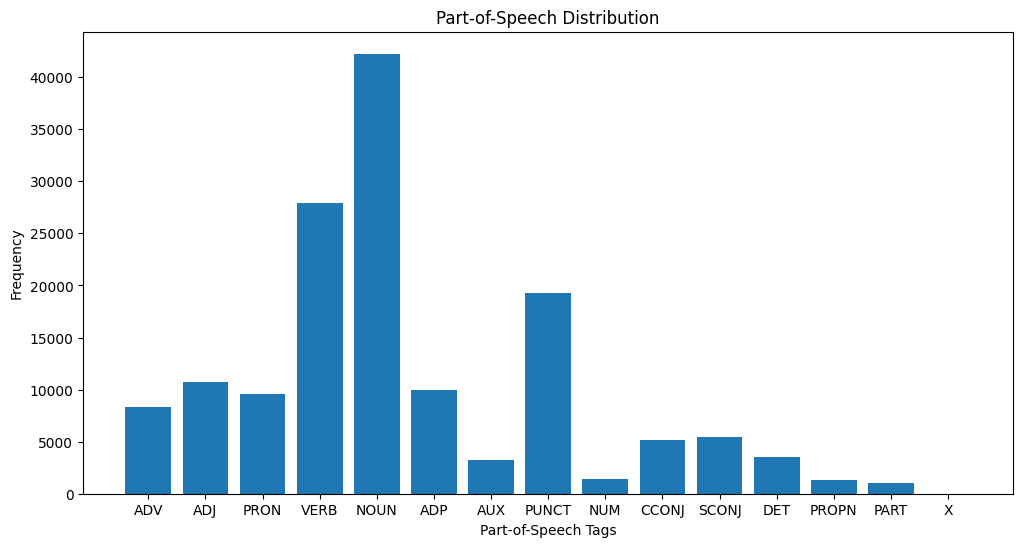

In [101]:
# POS 
def plot_pos_distribution(pos_tags):
    pos_freq = Counter(pos_tags)
    pos, frequencies = zip(*pos_freq.items())

    plt.figure(figsize=(12, 6))
    plt.bar(pos, frequencies)
    plt.xlabel('Part-of-Speech Tags')
    plt.ylabel('Frequency')
    plt.title('Part-of-Speech Distribution')

    plt.show()

pos_tags = cltk_doc.pos
plot_pos_distribution(pos_tags)

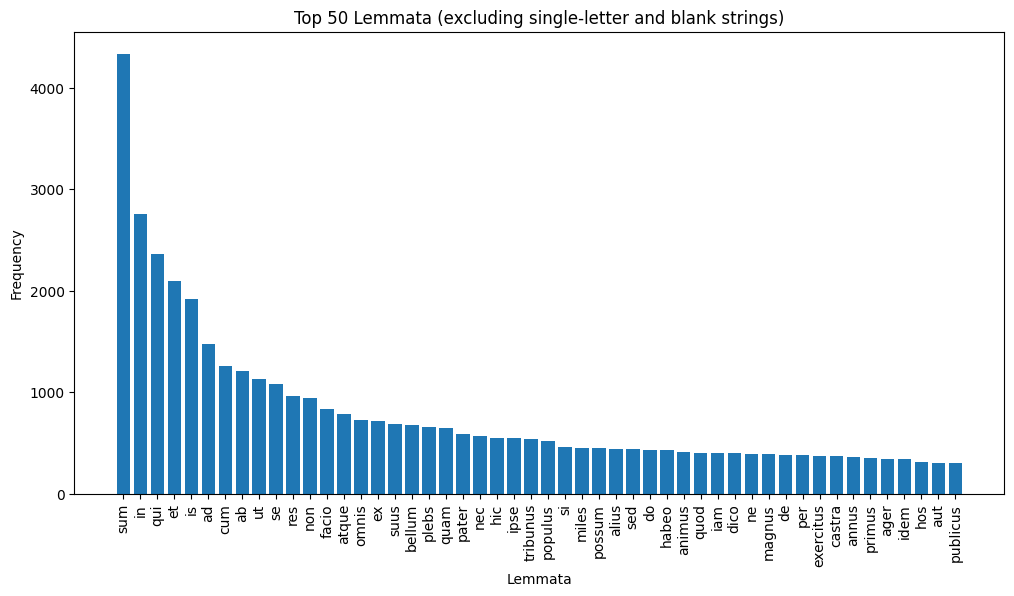

In [14]:
# lemmata
def plot_top_lemmata(lemmata, n_most_common=50):
    # Filter out single-letter and blank strings
    filtered_lemmata = [lemma for lemma in lemmata if len(lemma) > 1 and lemma.strip() != '']

    lemma_freq = Counter(filtered_lemmata)
    top_lemmata = lemma_freq.most_common(n_most_common)
    lemmata, frequencies = zip(*top_lemmata)

    plt.figure(figsize=(12, 6))
    plt.bar(lemmata, frequencies)
    plt.xlabel('Lemmata')
    plt.ylabel('Frequency')
    plt.title(f'Top {n_most_common} Lemmata (excluding single-letter and blank strings)')
    plt.xticks(rotation=90)

    plt.show()

lemmata = cltk_doc.lemmata
plot_top_lemmata(lemmata)

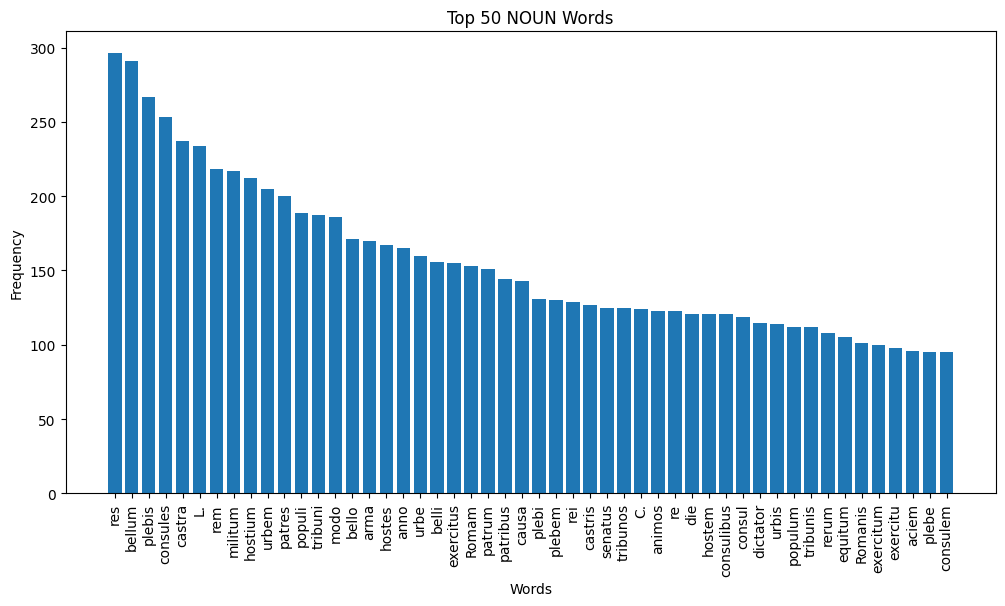

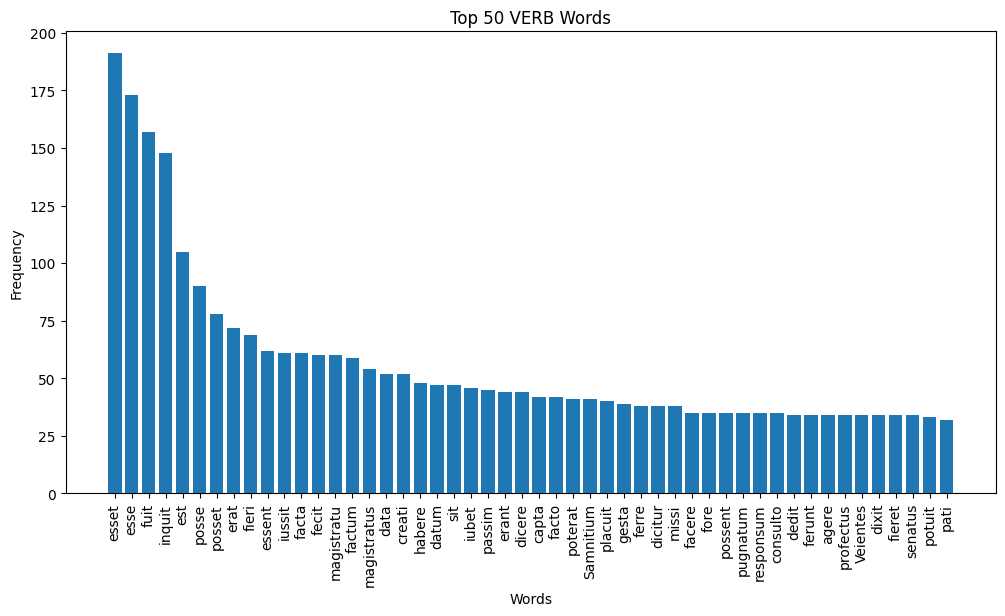

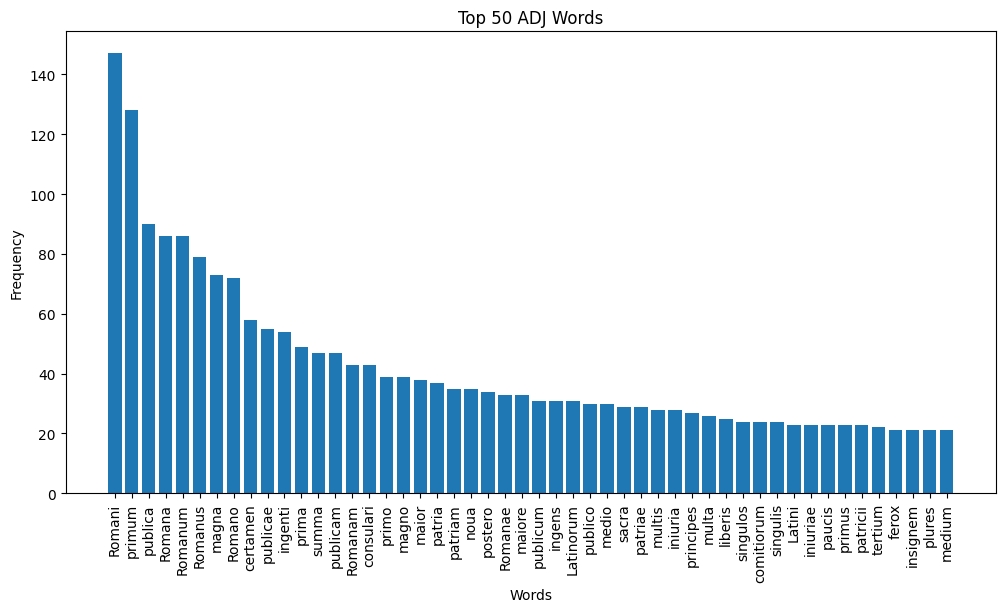

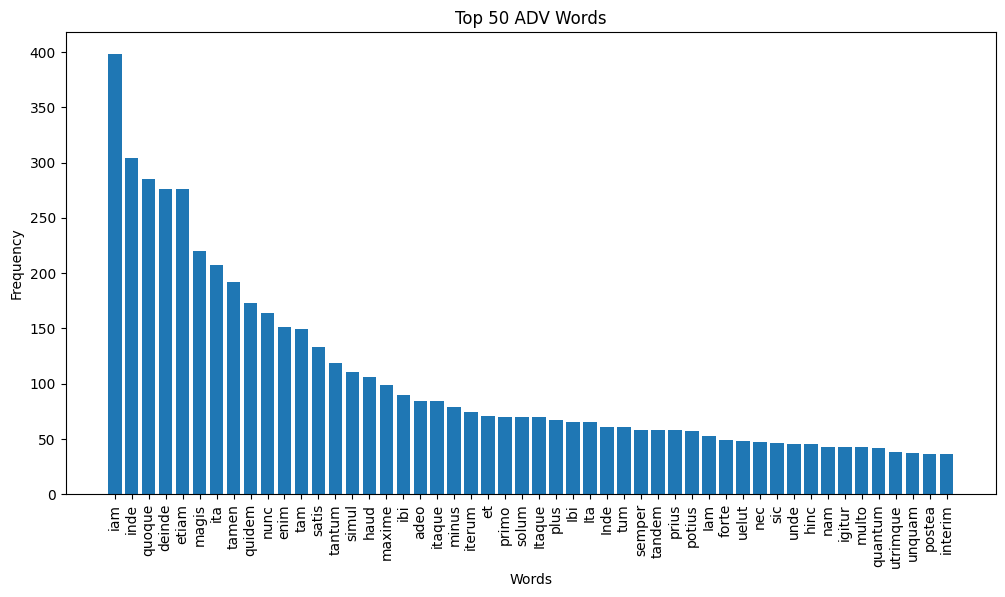

In [15]:
#Plot top parts of speech
def plot_top_words_by_pos(word_texts, pos_tags, target_pos, n_most_common=50):
    # Filter words by target POS
    filtered_words = [word_text for word_text, pos in zip(word_texts, pos_tags) if pos == target_pos]

    # Calculate word frequencies and select top words
    word_freq = Counter(filtered_words)
    top_words = word_freq.most_common(n_most_common)
    words, frequencies = zip(*top_words)

    # Plot top words for target POS
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n_most_common} {target_pos} Words')
    plt.xticks(rotation=90)

    plt.show()

words = cltk_doc.words
word_texts = [word.string for word in words]
pos_tags = cltk_doc.pos

# Call the function for different POS categories
plot_top_words_by_pos(word_texts, pos_tags, 'NOUN')
plot_top_words_by_pos(word_texts, pos_tags, 'VERB')
plot_top_words_by_pos(word_texts, pos_tags, 'ADJ')
plot_top_words_by_pos(word_texts, pos_tags, 'ADV')
#This function, plot_top_words_by_pos, takes the words, their corresponding POS tags, 
# the target POS category, and the number of most common words to plot. 
#It filters the words based on the target POS category


In [205]:
# morphosyntactic features?
# this seems to be exceptionally computationally intensive. I guess for loops on all tokens will inevitably take long
#i'm adding a progress bar and time stuff

from tqdm import tqdm

from cltk.core.data_types import Word

def extract_morphosyntactic_features_by_pos(cltk_doc, target_pos):
    morphosyntactic_features = {}
    words = cltk_doc.words
    pos_tags = cltk_doc.pos
    for i, (word, pos_tag) in tqdm(enumerate(zip(words, pos_tags)), total=len(words)):
        if pos_tag == target_pos:
            word_str = str(Word(word))
            morphosyntactic_features[word_str] = cltk_doc.morphosyntactic_features[i]
    return morphosyntactic_features


import time

start_time = time.time()
noun_mfeats = extract_morphosyntactic_features_by_pos(cltk_doc, 'NOUN')
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.2f} seconds")



100%|███████████████████████████████████████████████████████████| 149199/149199 [29:26<00:00, 84.48it/s]

Elapsed time: 1766.14 seconds


In [16]:
primum = cltk_doc.words[1]
print(primum.category)

{F: [neg], N: [pos], V: [pos]}


In [17]:
# check
len(noun_mfeats)

NameError: name 'noun_mfeats' is not defined

In [19]:
import pandas as pd
from cltk.core.data_types import Doc

def subset_pos(cltk_doc):
    pos_dict = {}

    for word in cltk_doc.words:
        pos = str(word.pos)  # Convert POS object to string

        if pos not in pos_dict:
            pos_dict[pos] = []

        pos_dict[pos].append(word)

    return pos_dict

def create_pos_dataframes(cltk_doc):
    pos_subsets = subset_pos(cltk_doc)
    pos_dfs = {}

    for pos, words in pos_subsets.items():
        words_data = []

        for word in words:
            word_data = {
                'index_char_start': word.index_char_start,
                'index_char_stop': word.index_char_stop,
                'index_token': word.index_token,
                'index_sentence': word.index_sentence,
                'string': word.string,
                'pos': word.pos,
                'lemma': word.lemma,
                'stem': word.stem,
                'scansion': word.scansion,
                'xpos': word.xpos,
                'upos': word.upos,
                'dependency_relation': word.dependency_relation,
                'governor': word.governor,
                'category': word.category,
                'stop': word.stop,
                'named_entity': word.named_entity,
                'syllables': word.syllables,
                'phonetic_transcription': word.phonetic_transcription,
                'definition': word.definition
            }

            for feature, value in word.features.items():
                word_data[str(feature)] = str(value[0]) if value else None

            words_data.append(word_data)

        pos_dfs[pos] = pd.DataFrame(words_data)

    return pos_dfs

pos_dataframes = create_pos_dataframes(cltk_doc)
noun_dataframe = pos_dataframes['noun']
adjective_dataframe = pos_dataframes['adjective']
proper_noun_dataframes = pos_dataframes['proper_noun']
Coordconj_dataframes = pos_dataframes['coordinating_conjunction']
particle_dataframe = pos_dataframes['particle']
proper_noun_dataframe = pos_dataframes['proper_noun']
verb_dataframe = pos_dataframes['verb']

In [20]:
def group_words_by_features(df):
    grouped = df.groupby(['Case', 'Gender', 'Number'])['string'].apply(list).reset_index()
    return grouped


def group_words_by_features_V(df):
    grouped = df.groupby(['Mood', 'Number', 'Person','Tense','VerbForm', 'Voice'])['string'].apply(list).reset_index()
    return grouped

In [283]:
verb_dataframe

,index_char_start,index_char_stop,index_token,index_sentence,string,pos,lemma,stem,scansion,xpos,...,Mood,Number,Person,Tense,VerbForm,Voice,Case,Degree,Gender,VerbType
0,None,None,4,0,constat,17,consto,None,None,J3|modA|tem1|gen6,...,indicative,singular,third,present,finite,active,NaN,NaN,NaN,NaN
1,None,None,6,0,capta,17,capio,None,None,L2|modM|tem4|grp1|casA|gen2,...,NaN,singular,NaN,past,participle,passive,nominative,positive,feminine,NaN
2,None,None,9,0,saevitum,17,saevitum,None,None,L2|modM|tem4|grp1|casK|gen1,...,NaN,plural,NaN,past,participle,passive,genitive,positive,masculine,NaN
3,None,None,16,0,Antenorique,17,Antenorique,None,None,L2|modD|tem1|grp1|casF|gen1,...,NaN,singular,NaN,present,participle,active,ablative,positive,NaN,NaN
4,None,None,25,0,reddendaeque,17,reddendo,None,None,L2|modO|grp1|casJ|gen2,...,NaN,singular,NaN,NaN,gerundive,passive,nominative,positive,feminine,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,None,None,4,8372,prosequentes,17,prosequor,None,None,L2|modD|tem1|grp1|casJ|gen1,...,NaN,plural,NaN,present,participle,active,nominative,positive,masculine,NaN
27961,None,None,10,8372,irent,17,ireo,None,None,N3|modB|tem2|gen9,...,subjunctive,plural,third,past,finite,active,NaN,NaN,NaN,NaN
27962,None,None,12,8372,temptata,17,tempto,None,None,J2|modM|tem4|grp1|casA|gen2,...,NaN,singular,NaN,past,participle,passive,nominative,positive,feminine,NaN
27963,None,None,15,8372,est,17,sum,None,None,N3|modA|tem1|gen6,...,indicative,singular,third,present,finite,active,NaN,NaN,NaN,NaN


In [21]:
grouped_nouns = group_words_by_features(noun_dataframe)
grouped_adjectives = group_words_by_features(adjective_dataframe)
grouped_propernouns = group_words_by_features(proper_noun_dataframes)
grouped_proper_nouns = group_words_by_features(proper_noun_dataframe)
grouped_verbs = group_words_by_features_V(verb_dataframe)

,Case,Gender,Number,string
0,ablative,feminine,plural,"[divinis, finitimis, querellis, alienis, propi..."
1,ablative,feminine,singular,"[simili, Sicilia, patria, dextra, stabili, cer..."
2,ablative,masculine,plural,"[Euganeisque, publicis, finitimis, liberis, mu..."
3,ablative,masculine,singular,"[immenso, publico, opulento, Albano, sicco, au..."
4,ablative,neuter,plural,"[lenibus, multis, iussis, Pinariis, insignibus..."
5,ablative,neuter,singular,"[nimio, certo, Faustulo, certo, miti, Priori, ..."
6,accusative,feminine,plural,"[infantes, iuvenes, multas, vicinas, magnas, i..."
7,accusative,feminine,singular,"[Troianam, Aeneam, opulentam, novam, Longam, v..."
8,accusative,masculine,plural,"[posteros, segnes, infantes, voltures, aversos..."
9,accusative,masculine,singular,"[Latinum, Latinum, celebre, puerilem, primum, ..."


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram_N(df, pos_type):
    # Calculate word counts for each group
    df['word_count'] = df['string'].apply(len)

    # Create a column that combines Case, Gender, and Number as the label
    df['label'] = df['Case'] + ', ' + df['Gender'] + ', ' + df['Number']

    # Group by label and aggregate word counts and find the most common instance
    grouped_df = df.groupby('label').agg({'word_count': 'sum', 'string': lambda x: x.value_counts().index[0]})

    # Sort the dataframe by word_count in descending order
    grouped_df = grouped_df.sort_values('word_count', ascending=False)

    # Set the size and style of the plot
    plt.figure(figsize=(12, 6))
    plt.style.use('ggplot')

    # Create the histogram
    plt.bar(grouped_df.index, grouped_df['word_count'])
    plt.xlabel('Feature Combinations (Case, Gender, Number)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} by Feature Combinations')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the most common instance for each feature combination
    for i, (index, row) in enumerate(grouped_df.iterrows()):
        plt.text(i, row['word_count'], row['string'], ha='center', va='bottom', rotation=45, fontsize=8)

    # Display the histogram
    plt.show()

def plot_histogram_V(df, pos_type):
    # Calculate word counts for each group
    df['word_count'] = df['string'].apply(len)

    # Create a column that combines Case, Gender, and Number as the label
    df['label'] = df['Mood'] + ', ' + df['Number'] + ', ' + df['Person'] + ', ' + df['Tense'] + ', ' + df['VerbForm'] + ', ' + df['Voice']

    # Group by label and aggregate word counts and find the most common instance
    grouped_df = df.groupby('label').agg({'word_count': 'sum', 'string': lambda x: x.value_counts().index[0]})

    # Sort the dataframe by word_count in descending order
    grouped_df = grouped_df.sort_values('word_count', ascending=False)

    # Set the size and style of the plot
    plt.figure(figsize=(12, 6))
    plt.style.use('ggplot')

    # Create the histogram
    plt.bar(grouped_df.index, grouped_df['word_count'])
    plt.xlabel('Feature Combinations (Mood, Number, Person, Tense, VerbForm, Voice)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} by Feature Combinations')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the most common instance for each feature combination
    for i, (index, row) in enumerate(grouped_df.iterrows()):
        plt.text(i, row['word_count'], row['string'], ha='center', va='bottom', rotation=45, fontsize=8)

    # Display the histogram
    plt.show()

plot_histogram_N(grouped_nouns, 'Nouns')
plot_histogram_N(grouped_adjectives, 'Adjectives')
plot_histogram_N(grouped_propernouns, 'Proper Nouns')



ValueError: Image size of 159302x159942 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

In [66]:
# SRL???????
!pip install allennlp==2.7.0
!pip install huggingface_hub==0.0.19


  Using cached allennlp-2.7.0-py3-none-any.whl (738 kB)
  Using cached huggingface_hub-0.13.4-py3-none-any.whl (200 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires filelock<3.9,>=3.4, but you have filelock 3.0.12 which is incompatible.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.13.4 which is incompatible.
  Using cached huggingface_hub-0.0.19-py3-none-any.whl (56 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.13.4
    Uninstalling huggingface-hub-0.13.4:
      Successfully uninstalled huggingface-hub-0.13.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 1.18.4 requires huggingface-hub<1.0.0,>=0.1.0, but you have huggingface-hub 0.0.19 which is incompatible.
cached-path 1.1.6 requires filelock<3.9,>=3.4, but you have filelock 3.0.12 which is incompatible.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.0.19 which is incompatible.


In [297]:


from allennlp.predictors.predictor import Predictor
import allennlp_models.structured_prediction

# Load the pre-trained SRL model
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/bert-base-srl-2020.03.24.tar.gz")

# English translation of the Latin sentence
english_sentence = "There, the Trojans having gone out, so that from a nearly immense error nothing besides arms and ships would remain, when they were driving booty from the fields, King Latinus and the Aborigines, who then were holding those places, armed, came together from the city and the fields to resist the force of the newcomers."

# Perform SRL on the English sentence
srl_result = predictor.predict(sentence=english_sentence)

# Print the SRL result
for verb in srl_result['verbs']:
    print(verb['description'])

ImportError: cannot import name 'EntryNotFoundError' from 'huggingface_hub.utils' (/root/py3.9/lib/python3.9/site-packages/huggingface_hub/utils/__init__.py)

In [78]:
grouped_verbs

,Mood,Number,Person,Tense,VerbForm,Voice,string,word_count,label
0,imperative,plural,second,present,finite,active,"[Tenuere, Iuppiter, vertite, Fremere, create, ...",133,"imperative,plural, second, present, finite, ac..."
1,imperative,singular,second,present,finite,active,"[nate, salue, ""te, deme, siste, Tulle, Tulle, ...",120,"imperative,singular, second, present, finite, ..."
2,indicative,plural,first,future,finite,active,"[peribimus, uiuemus., consulemus, uigemusque, ...",15,"indicative,plural, first, future, finite, active"
3,indicative,plural,first,future,finite,passive,"[patiemur, uidebimur, experiemur, tutabimur, p...",5,"indicative,plural, first, future, finite, passive"
4,indicative,plural,first,past,finite,active,"[accepimus, regnauimus, coniurauimus, sensimus...",58,"indicative,plural, first, past, finite, active"
5,indicative,plural,first,past,finite,passive,"[Decemuiri, Decemuiri, Decemuiri]",3,"indicative,plural, first, past, finite, passive"
6,indicative,plural,first,present,finite,active,"[""Vicimus, ""—""Sumus, ""—""Dedimus, credimus, con...",87,"indicative,plural, first, present, finite, active"
7,indicative,plural,first,present,finite,passive,"[inuisimusque, fatemur, decemuiri, admittimur,...",9,"indicative,plural, first, present, finite, pas..."
8,indicative,plural,second,future,finite,active,"[dederetis, Optabitis, tolleretis, exspectabit...",27,"indicative,plural, second, future, finite, active"
9,indicative,plural,second,future,finite,passive,[tutaremini],1,"indicative,plural, second, future, finite, pas..."


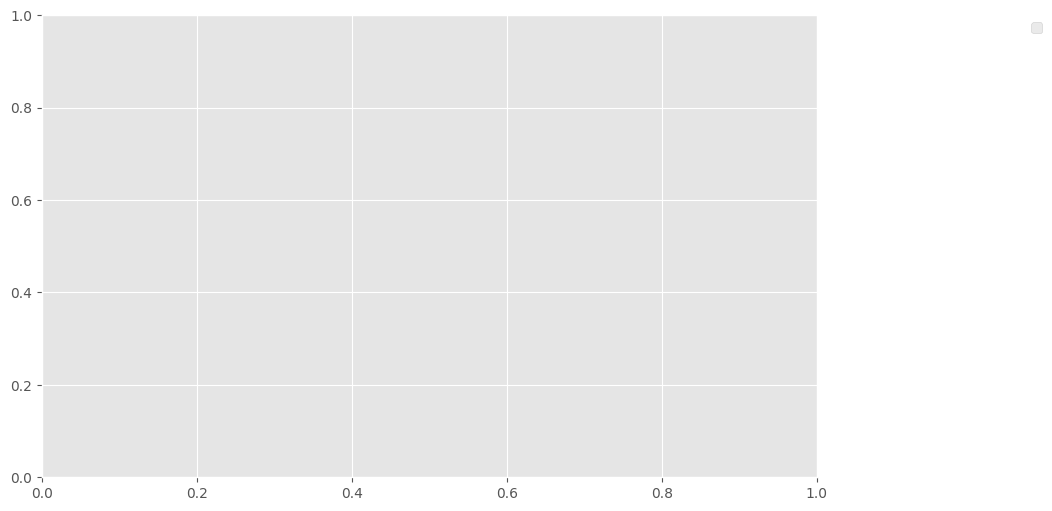

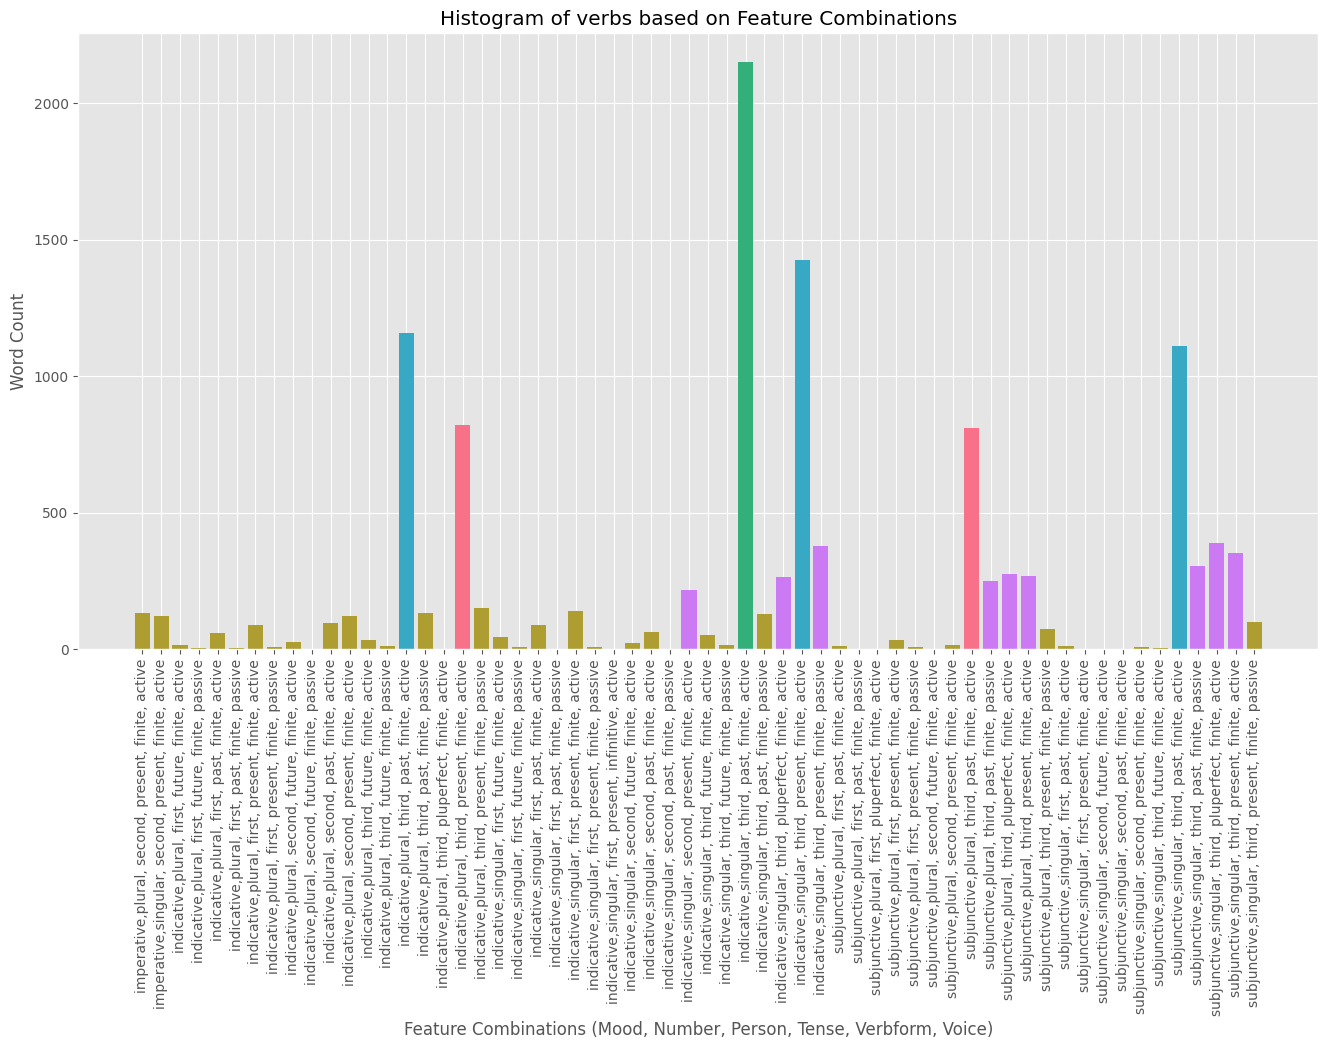

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

def plot_histogram_V(df, pos_type):
    # K-means clustering
    num_clusters = 5  # You can choose the number of clusters based on your preference
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df[["word_count"]])

    # Assign cluster colors
    palette = sns.color_palette("husl", num_clusters)
    colors = [palette[label] for label in cluster_labels]
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.figure(figsize=(16, 8))
    plt.style.use('ggplot')
    plt.bar(df['label'], df['word_count'], color=colors)
    plt.xlabel('Feature Combinations (Mood, Number, Person, Tense, Verbform, Voice)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} based on Feature Combinations')
    plt.xticks(rotation=90)
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    cluster_labels = ['Cluster ' + str(i+1) for i in range(num_clusters)]
    legend_labels = [label + '\n' + cluster_label for label in labels for cluster_label in cluster_labels]
    ax.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.show()

# Use the modified function to plot the histogram
plot_histogram_V(grouped_verbs, 'verbs')



In [3]:
def plot_histogram_V(df, pos_type):
    # K-means clustering
    num_clusters = 5  # You can choose the number of clusters based on your preference
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df[["word_count"]])

    # Assign cluster colors
    palette = sns.color_palette("husl", num_clusters)
    colors = [palette[label] for label in cluster_labels]

    plt.figure(figsize=(16, 8))
    plt.style.use('ggplot')
    plt.bar(df['label'], df['word_count'], color=colors)
    plt.xlabel('Feature Combinations (Mood, Number, Person, Tense, Verbform, Voice)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} based on Feature Combinations')
    plt.xticks(rotation=90)

    # Create legend
    legend_labels = ['Cluster ' + str(i) for i in range(num_clusters)]
    handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(num_clusters)]
    plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.show() 
    
plot_histogram_V(grouped_verbs, 'verbs')


def plot_histogram_V(df, pos_type):
    # K-means clustering
    num_clusters = 5  # You can choose the number of clusters based on your preference
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df[["word_count"]])

    # Assign cluster colors
    palette = sns.color_palette("husl", num_clusters)
    colors = [palette[label] for label in cluster_labels]

    plt.figure(figsize=(16, 8))
    plt.style.use('ggplot')
    bars = plt.bar(df['label'], df['word_count'], color=colors)
    plt.xlabel('Feature Combinations (Mood, Number, Person, Tense, Verbform, Voice)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} based on Feature Combinations')
    plt.xticks(rotation=90)

    # Create legend
    legend_labels = ['Cluster ' + str(i) for i in range(num_clusters)]
    handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(num_clusters)]
    plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

    # Calculate the percentages for each feature combination and display them on the graph
    total_word_count = sum(df['word_count'])
    for bar, label, word_count in zip(bars, df['label'], df['word_count']):
        percentage = (word_count / total_word_count) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

plot_histogram_V(grouped_verbs, 'verbs')


NameError: name 'grouped_verbs' is not defined

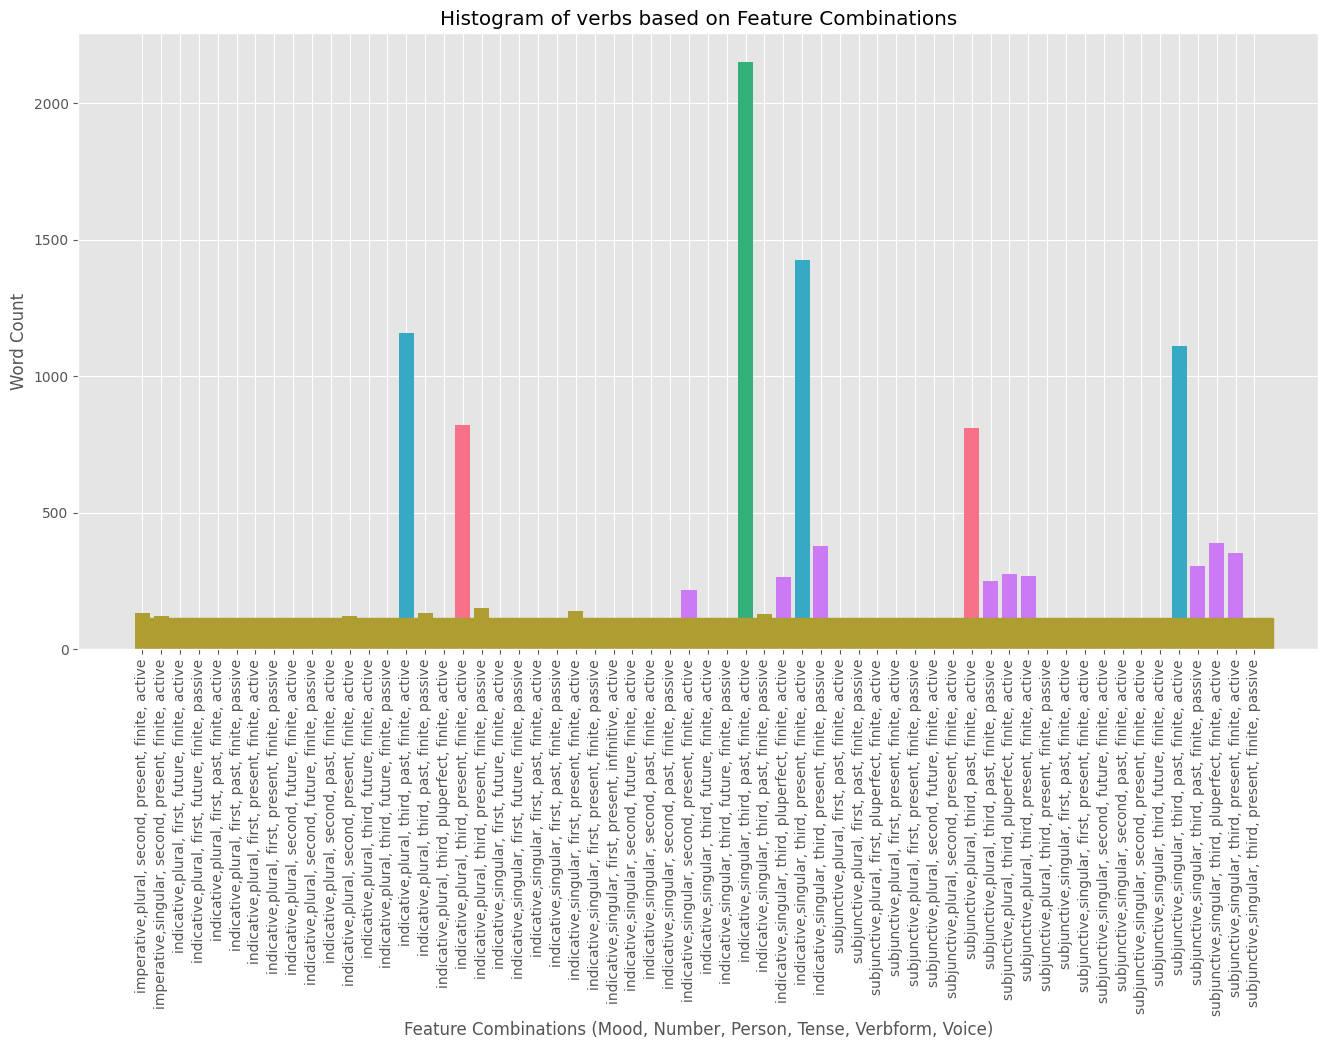

In [105]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
def plot_histogram_V(df, pos_type):
    # K-means clustering
    num_clusters = 5  # You can choose the number of clusters based on your preference
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df[["word_count"]])

    # Assign cluster colors
    palette = sns.color_palette("husl", num_clusters)
    colors = [palette[label] for label in cluster_labels]

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(16, 8))

    # Plot the histogram
    rects = ax.bar(df['label'], df['word_count'], color=colors)

    # Set the labels and title of the plot
    ax.set_xlabel('Feature Combinations (Mood, Number, Person, Tense, Verbform, Voice)')
    ax.set_ylabel('Word Count')
    ax.set_title(f'Histogram of {pos_type} based on Feature Combinations')
    ax.tick_params(axis='x', rotation=90)

    # Add brackets for cluster labels
    add_brackets(ax, cluster_labels, colors)

    # Show the plot
    plt.show()

import matplotlib.patches as patches

def add_brackets(ax, cluster_labels, colors):
    brackets = []
    prev_label = cluster_labels[0]
    x_start = 0
    for i, label in enumerate(cluster_labels):
        if label != prev_label:
            x_end = i
            width = x_end - x_start
            brackets.append((prev_label, x_start, width))
            x_start = i
        prev_label = label
    # Add the last bracket
    brackets.append((prev_label, x_start, len(cluster_labels) - x_start))

    bracket_height = ax.get_ylim()[1] * 0.05

    for label, x_start, width in brackets:
        rect = patches.Rectangle((x_start, 0), width, bracket_height, linewidth=1, edgecolor=colors[label], facecolor=colors[label], fill=True)
        ax.add_patch(rect)
plot_histogram_V(grouped_verbs, 'verbs') 

In [118]:
grouped_verbs

,Mood,Number,Person,Tense,VerbForm,Voice,string,word_count,label
0,imperative,plural,second,present,finite,active,"[Tenuere, Iuppiter, vertite, Fremere, create, ...",133,"imperative,plural, second, present, finite, ac..."
1,imperative,singular,second,present,finite,active,"[nate, salue, ""te, deme, siste, Tulle, Tulle, ...",120,"imperative,singular, second, present, finite, ..."
2,indicative,plural,first,future,finite,active,"[peribimus, uiuemus., consulemus, uigemusque, ...",15,"indicative,plural, first, future, finite, active"
3,indicative,plural,first,future,finite,passive,"[patiemur, uidebimur, experiemur, tutabimur, p...",5,"indicative,plural, first, future, finite, passive"
4,indicative,plural,first,past,finite,active,"[accepimus, regnauimus, coniurauimus, sensimus...",58,"indicative,plural, first, past, finite, active"
5,indicative,plural,first,past,finite,passive,"[Decemuiri, Decemuiri, Decemuiri]",3,"indicative,plural, first, past, finite, passive"
6,indicative,plural,first,present,finite,active,"[""Vicimus, ""—""Sumus, ""—""Dedimus, credimus, con...",87,"indicative,plural, first, present, finite, active"
7,indicative,plural,first,present,finite,passive,"[inuisimusque, fatemur, decemuiri, admittimur,...",9,"indicative,plural, first, present, finite, pas..."
8,indicative,plural,second,future,finite,active,"[dederetis, Optabitis, tolleretis, exspectabit...",27,"indicative,plural, second, future, finite, active"
9,indicative,plural,second,future,finite,passive,[tutaremini],1,"indicative,plural, second, future, finite, pas..."


In [127]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, leaves_list, set_link_color_palette
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def add_dendrogram(ax, df, dendr_order):
    # Add dendrogram to plot
    ax_dendr = ax.twinx().twiny()
    ax_dendr.set_axis_off()
    set_link_color_palette(["black"])
    dendr = dendrogram(linkage(squareform(pdist(np.array(df["word_count"].tolist()).reshape(-1, 1)), method="ward"), optimal_ordering=True), color_threshold=-1, above_threshold_color="black", no_labels=True, ax=ax_dendr)
    x_coord = ax.get_xlim()[1]
    y_coord = ax.get_ylim()[1]
    leaf_order = dendr["leaves"]
    label_colors = {}
    for leaf in leaf_order:
        label_colors[df.loc[leaf, "label"]] = dendr["color_list"][dendr["leaves"].index(leaf)]
    colors = [label_colors[x] for x in df["label"]]
    # Plot colored brackets
    cluster_labels = fcluster(linkage_matrix, t=5, criterion="distance")
    prev_label = cluster_labels[0]
    x_start = 0
    brackets = []
    for i, label in enumerate(cluster_labels[1:]):
        if label != prev_label:
            brackets.append((prev_label, x_start, i))
            x_start = i
        prev_label = label
    brackets.append((prev_label, x_start, len(cluster_labels) - x_start))
    bracket_height = ax.get_ylim()[1] * 0.05
    for label, x_start, width in brackets:
        rect = patches.Rectangle((x_start, 0), width, bracket_height, linewidth=1, edgecolor=colors[label], facecolor=colors[label], fill=True)
        ax.add_patch(rect)

        
def plot_histogram_V(df):
    # Calculate dendrogram and reorder dataframe
    dist_matrix = squareform(pdist(df.drop("word_count", axis=1)))
    linkage_matrix = linkage(dist_matrix, method="ward")
    dendr_order = dendrogram(linkage_matrix, no_plot=True)["ivl"]
    grouped_verbs = df.reset_index().set_index("string").loc[dendr_order].reset_index()
    # Plot histogram
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(grouped_verbs.index, grouped_verbs["word_count"], color="skyblue", alpha=0.8)
    ax.set_xticks(grouped_verbs.index)
    ax.set_xticklabels(grouped_verbs["string"], rotation=90)
    ax.set_xlabel("Verb")
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of Verbs")
    plt.show()
print(grouped_verbs.dtypes)

from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Mood', 'Number', 'Person', 'Tense', 'VerbForm', 'Voice']
for col in categorical_cols:
    grouped_verbs[col] = grouped_verbs[col].astype('category').cat.codes
    
plot_histogram_V(grouped_verbs) 

Mood           int64
Number         int64
Person         int64
Tense          int64
VerbForm       int64
Voice          int64
string        object
word_count     int64
label         object
dtype: object


ValueError: Unsupported dtype object

In [128]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, leaves_list, set_link_color_palette
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def add_dendrogram(ax, df, dendr_order):
    # Add dendrogram to plot
    ax_dendr = ax.twinx().twiny()
    ax_dendr.set_axis_off()
    set_link_color_palette(["black"])
    dendr = dendrogram(linkage(squareform(pdist(np.array(df["word_count"].tolist()).reshape(-1, 1)), method="ward"), optimal_ordering=True), color_threshold=-1, above_threshold_color="black", no_labels=True, ax=ax_dendr)
    x_coord = ax.get_xlim()[1]
    y_coord = ax.get_ylim()[1]
    leaf_order = dendr["leaves"]
    label_colors = {}
    for leaf in leaf_order:
        label_colors[df.loc[leaf, "label"]] = dendr["color_list"][dendr["leaves"].index(leaf)]
    colors = [label_colors[x] for x in df["label"]]
    # Plot colored brackets
    cluster_labels = fcluster(linkage_matrix, t=5, criterion="distance")
    prev_label = cluster_labels[0]
    x_start = 0
    brackets = []
    for i, label in enumerate(cluster_labels[1:]):
        if label != prev_label:
            brackets.append((prev_label, x_start, i))
            x_start = i
        prev_label = label
    brackets.append((prev_label, x_start, len(cluster_labels) - x_start))
    bracket_height = ax.get_ylim()[1] * 0.05
    for label, x_start, width in brackets:
        rect = patches.Rectangle((x_start, 0), width, bracket_height, linewidth=1, edgecolor=colors[label], facecolor=colors[label], fill=True)
        ax.add_patch(rect)

def plot_histogram_V(df):
    # Calculate dendrogram and reorder dataframe
    dist_matrix = squareform(pdist(df.drop("word_count", axis=1)))
    linkage_matrix = linkage(dist_matrix, method="ward")
    dendr_order = dendrogram(linkage_matrix, no_plot=True)["ivl"]
    grouped_verbs = df.reset_index().set_index("string").loc[dendr_order].reset_index()
    # Convert categorical columns to numerical codes
    categorical_cols = ['Mood', 'Number', 'Person', 'Tense', 'VerbForm', 'Voice']
    for col in categorical_cols:
        grouped_verbs[col] = grouped_verbs[col].astype('category').cat.codes
    # Plot histogram
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(grouped_verbs.index, grouped_verbs["word_count"], color="skyblue", alpha=0.8)
    ax.set_xticks(grouped_verbs.index)
    ax.set_xticklabels(grouped_verbs["string"], rotation=90)
    ax.set_xlabel("Verb")
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of Verbs")
    plt.show()

print(grouped_verbs.dtypes)

plot_histogram_V(grouped_verbs) 

#This code should convert the categorical columns to numerical codes, which can be used in the dendrogram and histogram


Mood            int8
Number          int8
Person          int8
Tense           int8
VerbForm        int8
Voice           int8
string        object
word_count     int64
label         object
dtype: object


ValueError: Unsupported dtype object

In [ ]:
# Distance of word to word including POS
# Quantitatively define the prose style of an author
# make a stylistic compassplot of prose authors 
# identify what the axes of these plots are
# multidimensional plot style 
# are there stylistic axes already defined?
# REALLY work on defining a set of metrics for style
# sources, self generated. Create the axes to make compass plots
# Why am I doing this?
# Axes:
# Umstaendlich-direkt, , 